# QUESTION

Use the heart disease dataset in Sklearn to build a Decision Tree model to predict whether a patient has heart disease or not based on their medical information. Tune the hyperparameters of the model using grid search and evaluate its performance using cross-validation.

### Heart Disease

### Import Header Files

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import load_diabetes
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix

### Load Data

In [2]:
df = pd.read_csv("heart.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


### Data Information

In [3]:
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Data Cleaning

In [7]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
df['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

C:\Users\Public\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target', ylabel='count'>

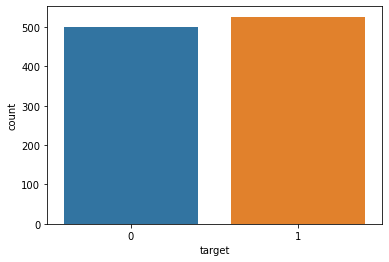

In [9]:
sns.countplot(df['target'])

<AxesSubplot:>

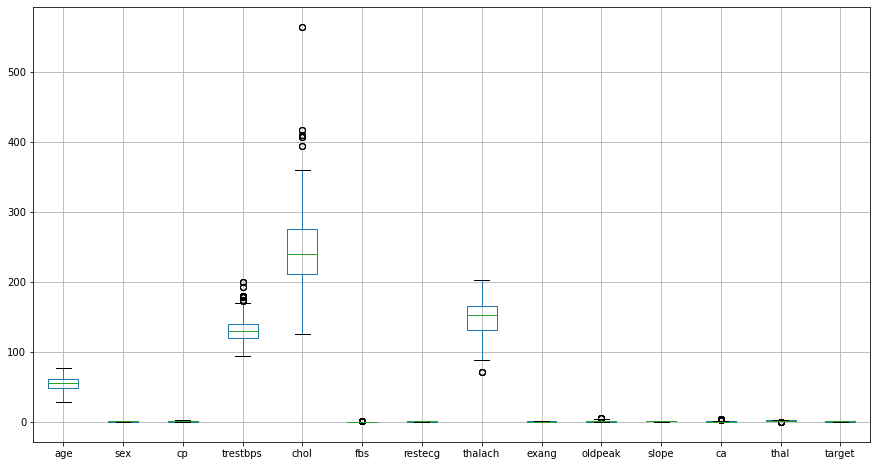

In [10]:
df.boxplot(figsize = [15,8])

In [11]:
scalar = MinMaxScaler()
scaled = scalar.fit_transform(df[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']])
data1 = pd.DataFrame(data = scaled, columns = df.columns)
data1

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.479167,1.0,0.000000,0.292453,0.196347,0.0,0.5,0.740458,0.0,0.161290,1.0,0.50,1.000000,0.0
1,0.500000,1.0,0.000000,0.433962,0.175799,1.0,0.0,0.641221,1.0,0.500000,0.0,0.00,1.000000,0.0
2,0.854167,1.0,0.000000,0.481132,0.109589,0.0,0.5,0.412214,1.0,0.419355,0.0,0.00,1.000000,0.0
3,0.666667,1.0,0.000000,0.509434,0.175799,0.0,0.5,0.687023,0.0,0.000000,1.0,0.25,1.000000,0.0
4,0.687500,0.0,0.000000,0.415094,0.383562,1.0,0.5,0.267176,0.0,0.306452,0.5,0.75,0.666667,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,0.625000,1.0,0.333333,0.433962,0.216895,0.0,0.5,0.709924,1.0,0.000000,1.0,0.00,0.666667,1.0
1021,0.645833,1.0,0.000000,0.292453,0.301370,0.0,0.0,0.534351,1.0,0.451613,0.5,0.25,1.000000,0.0
1022,0.375000,1.0,0.000000,0.150943,0.340183,0.0,0.0,0.358779,1.0,0.161290,0.5,0.25,0.666667,0.0
1023,0.437500,0.0,0.000000,0.150943,0.292237,0.0,0.0,0.671756,0.0,0.000000,1.0,0.00,0.666667,1.0


<AxesSubplot:>

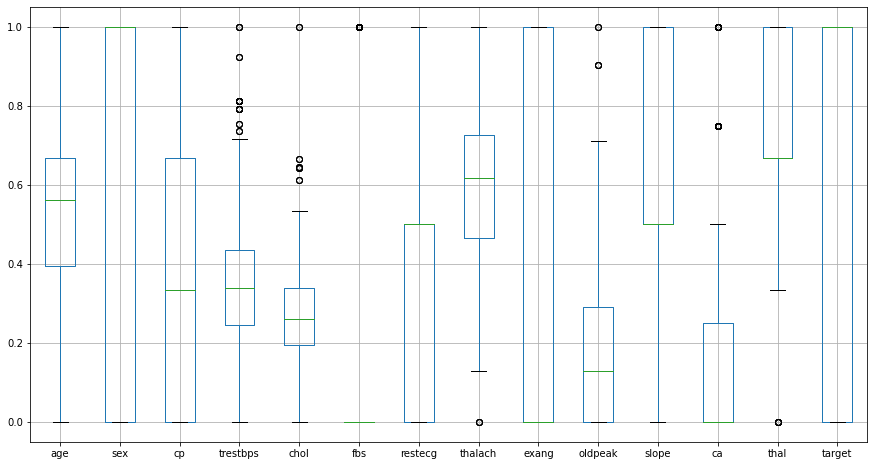

In [12]:
data1.boxplot(figsize = [15,8])

## OUTLIERS

### DETECTING OUTLIERS

In [13]:
def out_iqr(data, col):
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1
    lwr = q1 - 1.5 * iqr
    upr = q3 + 1.5 * iqr
    return lwr, upr

In [14]:
for i in data1.columns:
    lwr, upr = out_iqr(data1, i)
    data1[i].clip(lwr, upr, inplace = True)
data1

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.479167,1.0,0.000000,0.292453,0.196347,0.0,0.5,0.740458,0.0,0.161290,1.0,0.500,1.000000,0.0
1,0.500000,1.0,0.000000,0.433962,0.175799,0.0,0.0,0.641221,1.0,0.500000,0.0,0.000,1.000000,0.0
2,0.854167,1.0,0.000000,0.481132,0.109589,0.0,0.5,0.412214,1.0,0.419355,0.0,0.000,1.000000,0.0
3,0.666667,1.0,0.000000,0.509434,0.175799,0.0,0.5,0.687023,0.0,0.000000,1.0,0.250,1.000000,0.0
4,0.687500,0.0,0.000000,0.415094,0.383562,0.0,0.5,0.267176,0.0,0.306452,0.5,0.625,0.666667,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,0.625000,1.0,0.333333,0.433962,0.216895,0.0,0.5,0.709924,1.0,0.000000,1.0,0.000,0.666667,1.0
1021,0.645833,1.0,0.000000,0.292453,0.301370,0.0,0.0,0.534351,1.0,0.451613,0.5,0.250,1.000000,0.0
1022,0.375000,1.0,0.000000,0.150943,0.340183,0.0,0.0,0.358779,1.0,0.161290,0.5,0.250,0.666667,0.0
1023,0.437500,0.0,0.000000,0.150943,0.292237,0.0,0.0,0.671756,0.0,0.000000,1.0,0.000,0.666667,1.0


<AxesSubplot:>

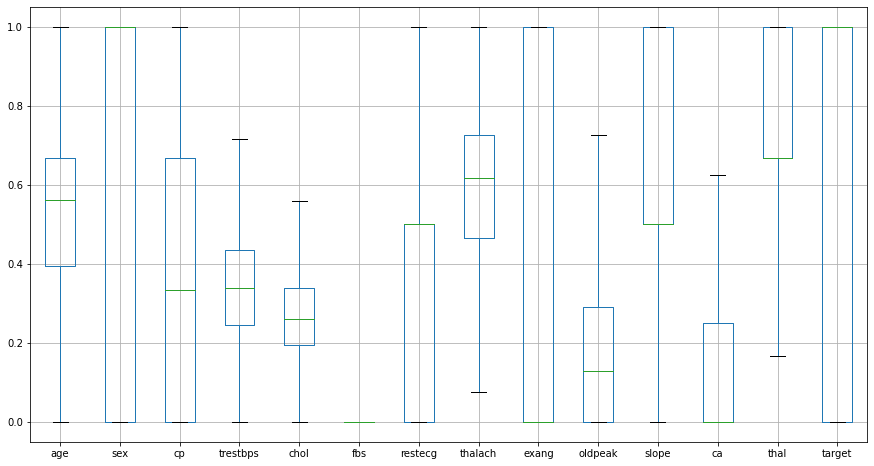

In [15]:
data1.boxplot(figsize = [15,8])

In [16]:
data1.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.278179,0.213481,NaN,-0.132696,-0.389986,0.088163,0.210314,-0.169105,0.320251,0.072426,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.067713,-0.181965,NaN,-0.055117,-0.048505,0.139157,0.091250,-0.026666,0.101424,0.200669,-0.279501
cp,-0.071966,-0.041119,1.000000,0.047868,-0.097159,NaN,0.043581,0.306946,-0.401513,-0.172375,0.131633,-0.203497,-0.166900,0.434854
trestbps,0.278179,-0.067713,0.047868,1.000000,0.135275,NaN,-0.127729,-0.044016,0.046996,0.173377,-0.110336,0.103535,0.047238,-0.132301
chol,0.213481,-0.181965,-0.097159,0.135275,1.000000,NaN,-0.137856,-0.031752,0.083081,0.067534,-0.006644,0.101442,0.089409,-0.118254
fbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
restecg,-0.132696,-0.055117,0.043581,-0.127729,-0.137856,NaN,1.000000,0.050195,-0.065606,-0.050546,0.086086,-0.097487,-0.020449,0.134468
thalach,-0.389986,-0.048505,0.306946,-0.044016,-0.031752,NaN,0.050195,1.000000,-0.383566,-0.354962,0.396394,-0.232903,-0.104007,0.423445
exang,0.088163,0.139157,-0.401513,0.046996,0.083081,NaN,-0.065606,-0.383566,1.000000,0.317703,-0.267335,0.135755,0.203724,-0.438029
oldpeak,0.210314,0.091250,-0.172375,0.173377,0.067534,NaN,-0.050546,-0.354962,0.317703,1.000000,-0.573686,0.256080,0.201083,-0.442847


<AxesSubplot:>

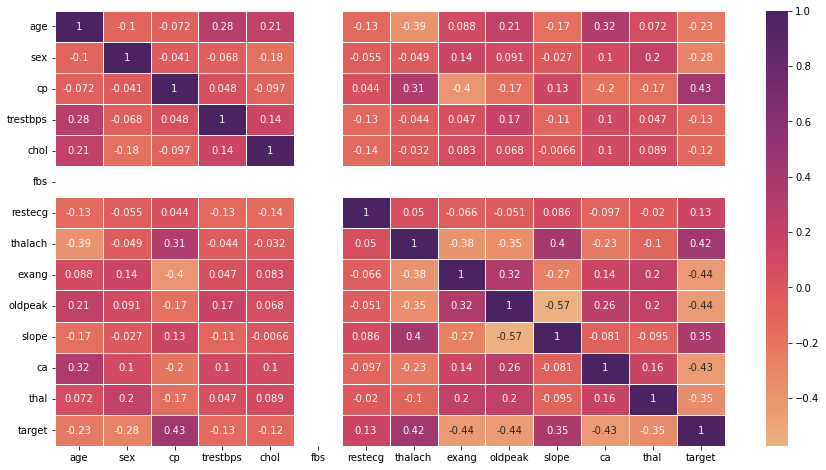

In [17]:
plt.figure(figsize = (15, 8))
sns.heatmap(data1.corr(), cmap = 'flare', annot = True, linewidths = 1)

In [18]:
col = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
X = data1[col]
y = data1['target']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [20]:
model = DecisionTreeClassifier(criterion = 'gini')
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [21]:
pred = model.predict(X_test)
pred

array([1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0.,
       1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1.,
       1., 1., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0.,
       0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
       0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0.,
       0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0.,
       0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0., 1.,
       0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1.,
       1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1.,
       0., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1.,
       0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0.,
       0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1.,
       0., 0., 1., 1., 1.

In [22]:
print(confusion_matrix(y_test,pred))

[[171   0]
 [  9 159]]


In [23]:
print(accuracy_score(y_test,pred))

0.9734513274336283


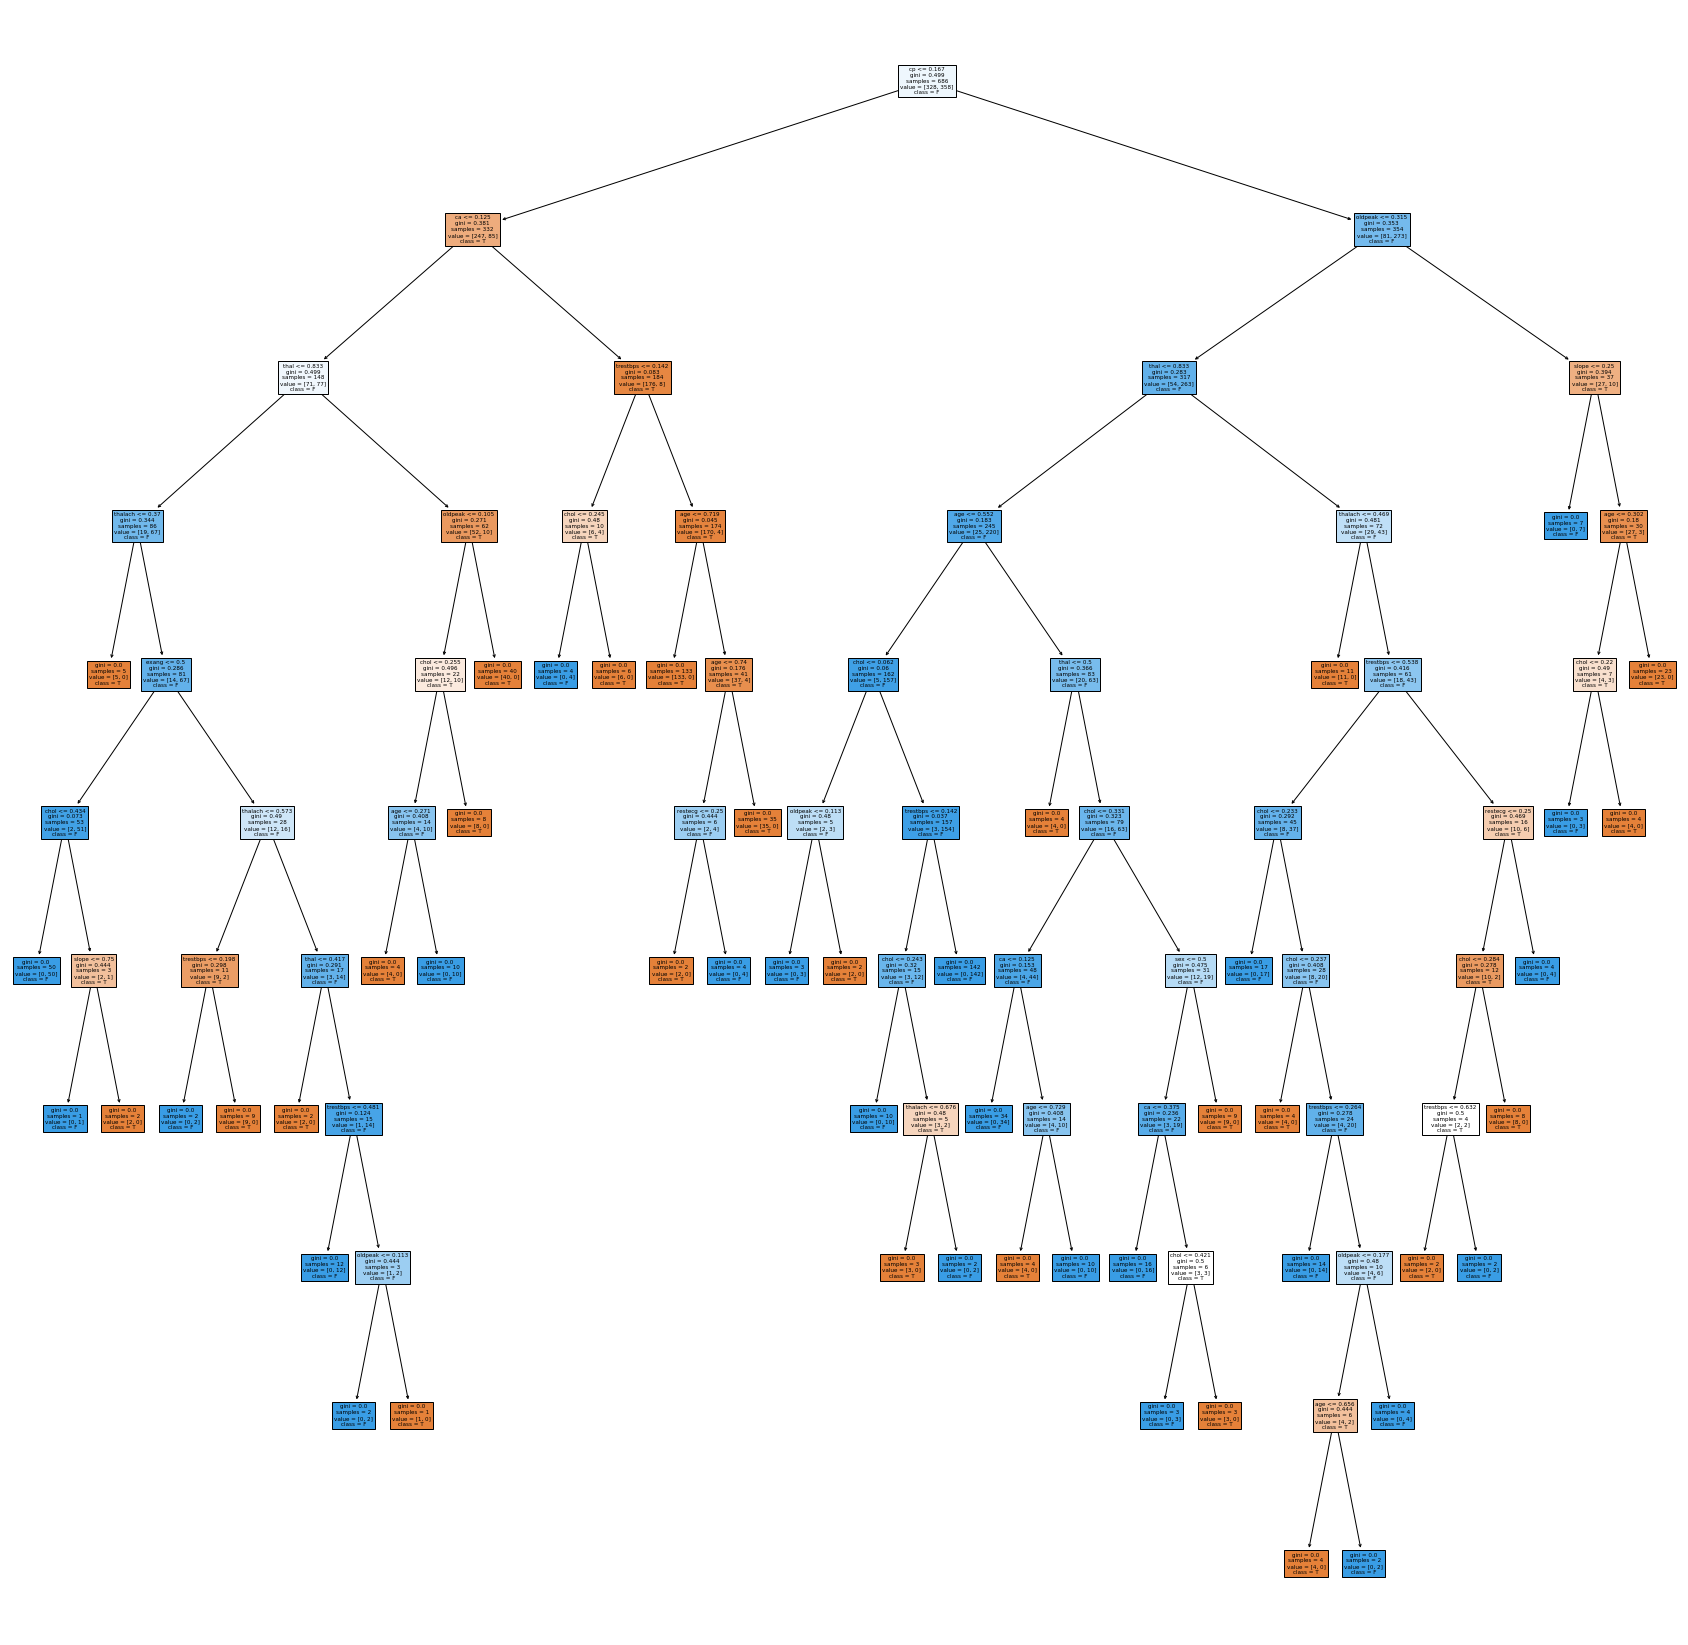

In [26]:
plt.figure(figsize = (30,30))
plot_tree(model, feature_names = col, class_names = ['T', 'F'], label='all', filled = True, impurity = 'gini')
plt.show()